Machine Learning

In [ ]:
import pandas as pd


In [ ]:
!pip install -q mlxtend

NLP ~ Natural Language Processing
Deep Learning ~ Neural network,,Trustpilot

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
from mlxtend.frequent_patterns import association_rules

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#Data wranggling
df["Description"]= df["Description"].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descriptive
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
#Basket Analysis
basket = (df[df['Country']=="France"].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket = (df[df['Country']=="France"].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One-hot Encodig

In [ ]:
def encode_units(x):
  if x <=0:
    return 0
  elif x >= 1:
    return 1
  else:
    return 0

In [ ]:
#Removing 'POSTAGE'
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

/tmp/ipython-input-36-3054267773.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Getting Frequent Items

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.071429                      (4 TRADITIONAL SPINNING TOPS)
1    0.096939                       (ALARM CLOCK BAKELIKE GREEN)
2    0.102041                        (ALARM CLOCK BAKELIKE PINK)
3    0.094388                         (ALARM CLOCK BAKELIKE RED)
4    0.068878                       (ASSORTED COLOUR MINI CASES)
..        ...                                                ...
108  0.102041  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
109  0.122449  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...
110  0.063776  (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...
111  0.068878  (PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...
112  0.099490  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...

[113 rows x 2 columns]


Applying Association rule

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[ (rules['lift']>= 6) &
      (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859,0.964734,0.591837,0.695480,0.744079
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383,0.959283,0.591837,0.736244,0.744079
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,1.0,0.064348,4.153061,0.960466,0.604167,0.759214,0.754392
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,1.0,0.064348,3.293135,0.968652,0.604167,0.696338,0.754392
8,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,1.0,0.058856,8.690476,0.993846,0.833333,0.884932,0.909392
9,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,1.0,0.058856,12.535714,0.991123,0.833333,0.920228,0.909392
38,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,1.0,0.047441,10.298469,0.985135,0.740741,0.902898,0.854545
39,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.063776,0.056122,0.051020,0.800000,14.254545,1.0,0.047441,4.719388,0.993188,0.740741,0.788108,0.854545


Getting  the number of Items

In [ ]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

np.float64(340.0)

In [ ]:
basket['ALARM CLOCK BAKELIKE RED'].sum()

np.float64(316.0)

Example 2 Association Rule

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
df1 = pd.read_csv('GroceryStoreDataSet.csv', names=['products'], sep=',')
df1.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [ ]:
data = list(df1["products"].apply(lambda x:x.split(',')))
data


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

One-hot Encoding

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df2 = pd.DataFrame(a_data,columns=a.columns_)
df2 = df2.replace(False,0)
df2

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


Applying apriori algorithm

In [ ]:
df2 = apriori(df2, min_support=0.2, use_colnames=True, verbose=1)
df2

Processing 42 combinations | Sampling itemset size 3


,support,itemsets
0,0.35,(BISCUIT)
1,0.2,(BOURNVITA)
2,0.65,(BREAD)
3,0.4,(COFFEE)
4,0.3,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.3,(SUGER)
8,0.35,(TEA)
9,0.2,"(BISCUIT, BREAD)"


In [ ]:
#Let's view our interpretation value using the Association rule function.
df_ar = association_rules(df2, metric="confidence", min_threshold=0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,1.0,0.0375,1.75,0.250000,0.285714,0.428571,0.553846
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,1.0,0.0050,1.05,0.035714,0.266667,0.047619,0.487179
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,1.0,0.0800,1.80,0.571429,0.400000,0.444444,0.583333
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,1.0,0.0800,1.80,0.571429,0.400000,0.444444,0.583333
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,1.0,0.1125,3.25,0.750000,0.500000,0.692308,0.685714


Classification

In [ ]:
import pandas as pd
# Import libraries and classes required
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load Iris dataset
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data cleaning ~ missing

In [ ]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Splitting data

In [ ]:
# Seperating the data into dependent and independent
x = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

Splitting if DV was not in last column

In [ ]:
# DV is in column named "Species"
x = iris.drop('Species', axis=1).values
y = iris['Species'].values


Splitting Data into Training and Testing

In [ ]:
#splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Standardizing the data

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
# summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', (accuracy_score(y_pred,y_test)) * 100)

accuracy is 100.0


In [ ]:
iris.shape

(150, 6)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', (accuracy_score(y_pred,y_test)) * 100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 100.0


Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', (accuracy_score(y_test,y_pred)) * 100)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.57      0.67      0.62         6

       accuracy                           0.83        30
      macro avg       0.80      0.81      0.81        30
   weighted avg       0.84      0.83      0.84        30

[[11  0  0]
 [ 0 10  3]
 [ 0  2  4]]
accuracy is 83.33333333333334


In [ ]:
#K Nearest Neighbors
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy is', (accuracy_score(y_test,y_pred)) * 100)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

accuracy is 100.0


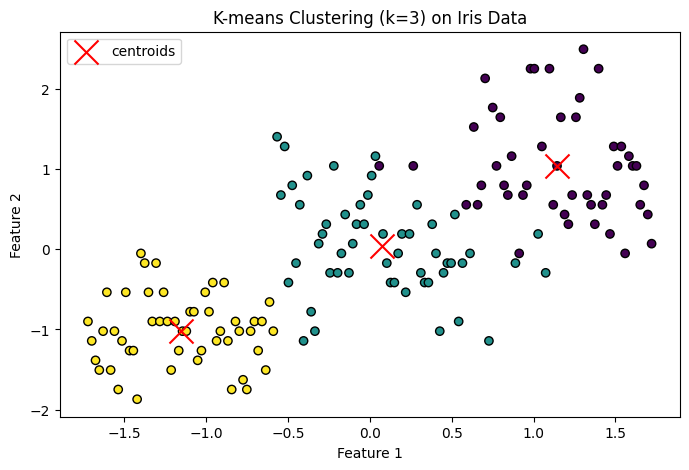

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
# Standardize the data (important for k means)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Apply k-means with k=3 (since we know Iris has 3 species)
k=3
kmeans =  KMeans(n_clusters =k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(x_scaled) # predict cluster labels

#plot clusters
plt.figure(figsize=(8,5))
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y_kmeans, cmap='viridis',edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', marker='x', label='centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-means Clustering (k={k}) on Iris Data")
plt.legend()
plt.show()


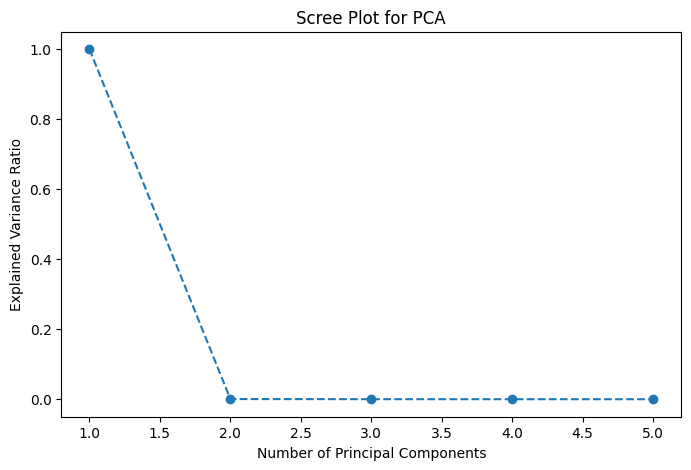

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

#Explained variance
explained_variance = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Missingness
MAR
MNAR
MCAR
MICE Technique to impute missing values

In [ ]:
!pip install -q pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 11.5 MB/s eta 0:00:00


pyreadstat include metadata

In [ ]:
import pandas as pd
import numpy as np
import pyreadstat as prd

Imputing data

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd